<a href="https://colab.research.google.com/github/arifnezami/an-git-demos/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbor

This algorithm selects k nearest neighbors from a given data point and assinges labels according to the neighborhood. 

Advantages:
*   No assumption about data
*   Insensitive to outliers


Disadvantages
*   Requires huge memory
*   Requires computations

Often it is called instance based or lazy method. It saves all the instances and searches for neighbors or closest elements. K is a very important hyper-parameter. After finding the labels of K nearest neighbor it then uses some aggreagting technique. 
*   Majority Voting (classification)
*   Weighted Voting (classification)
*   Uniform (regression)
*   distance weighted (regression)


## Lets create a dummy dataset and see how it works

In [ ]:
import numpy as np
feature_data = np.asarray([[0.0,1.0],
                           [-0.01,1.1],
                           [1.1,0.01],
                           [.99,-0.01]])
labels= np.asarray([1,1,0,0])

## Visualize the data

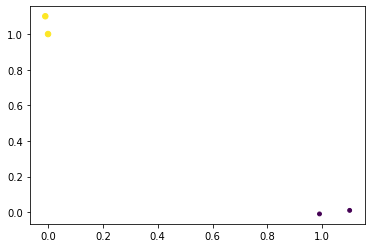

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(feature_data[:,0],feature_data[:,1], (labels+1)*15,(labels+1)*15)

## Implementation of KNN 

In [ ]:
from numpy import *
import operator
def classifyKNN(test_x,X,y,k):
  # change the y label to vector
  y=np.reshape(y,(y.shape[0],))

  
  dataSetSize = X.shape[0]
  diffMat = np.tile(test_x, (dataSetSize,1)) - X
  sqDiffMat = diffMat**2
  sqDistances = sqDiffMat.sum(axis=1)
  distances = sqDistances**0.5

  sortedDistIndicies = distances.argsort()

  
  classCount={}
  for i in range(k):
    voteIlabel = y[sortedDistIndicies[i]]
    classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
  sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
  return sortedClassCount[0][0]

## Test with a simple point

In [ ]:
classifyKNN([0.8,0],feature_data,labels,3)

0

## lets read a larger dataset

In this dataset there are three features and a class label. The class label has three discrete levels:

* A: does not like
* B: like for long period
* C: like for small period  

Three numeric features are there. They are:



* Number of frequent flyer miles earned per year
* Percentage of time spent playing video games
* Liters of ice cream consumed per week


In [ ]:
import pandas as pn

In [ ]:
data=pn.read_csv("https://raw.githubusercontent.com/swakkhar/MachineLearning/master/KNNDataSet.txt",sep='\t',header=None)

In [ ]:
data

,0,1,2,3
0,40920,8.326976,0.953952,C
1,14488,7.153469,1.673904,B
2,26052,1.441871,0.805124,A
3,75136,13.147394,0.428964,A
4,38344,1.669788,0.134296,A
...,...,...,...,...
995,11145,3.410627,0.631838,B
996,68846,9.974715,0.669787,A
997,26575,10.650102,0.866627,C
998,48111,9.134528,0.728045,C


In [ ]:
print(type(data))
import numpy as np
data = np.asarray(data)

<class 'pandas.core.frame.DataFrame'>


In [ ]:
data

array([[40920, 8.326976, 0.953952, 'C'],
       [14488, 7.153469, 1.673904, 'B'],
       [26052, 1.441871, 0.805124, 'A'],
       ...,
       [26575, 10.650102, 0.866627, 'C'],
       [48111, 9.134528, 0.7280449999999999, 'C'],
       [43757, 7.882600999999999, 1.332446, 'C']], dtype=object)

In [ ]:
data_X=data[:,:-1]
data_y=data[:,-1]

In [ ]:
data_X.shape

(1000, 3)

In [ ]:
print(data_y.shape)
data_y=np.asarray([0 if i == 'A' else 1 if i == 'B' else 2 for i in data_y])


(1000,)


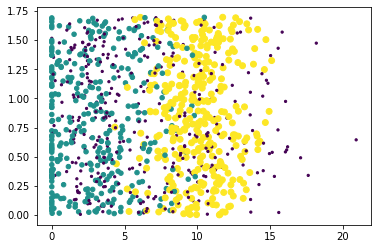

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data_X[:,1],data_X[:,2],data_y*15+5,data_y*15+5)


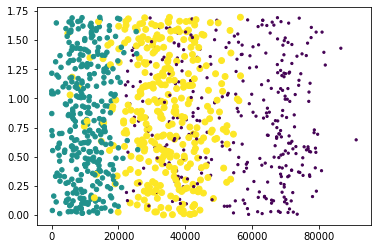

In [ ]:
plt.scatter(data_X[:,0],data_X[:,2],data_y*15+5,data_y*15+5)

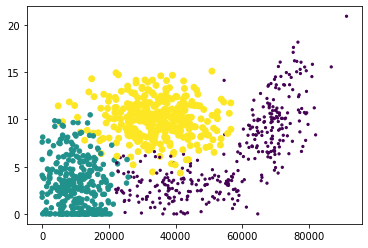

In [ ]:
plt.scatter(data_X[:,0],data_X[:,1],data_y*15+5,data_y*15+5)

In [ ]:
def TestWithOutNormalization():
  hoRatio = 0.10
  m = data_X.shape[0]
  numTestVecs = int(m*hoRatio)
  errorCount = 0.0
  for i in range(numTestVecs):
    classifierResult = classifyKNN(data_X[i,:],data_X[numTestVecs:m,:],data_y[numTestVecs:m],3)
    #print "the classifier came back with: %d, the real answer is: %d"% (classifierResult, datingLabels[i])
    if classifierResult != data_y[i]: 
      errorCount += 1.0
  print (errorCount/float(numTestVecs))
TestWithOutNormalization()

0.24


 -1 2 3

 -1 - (-1) / (3-(-1))
 = 0

2-(-1) / 4
= 0.75





In [ ]:
def autoNorm(dataSet):
  minVals = dataSet.min(0)
  maxVals = dataSet.max(0)
  ranges = maxVals - minVals
  normDataSet = zeros(shape(dataSet))
  m = dataSet.shape[0]
  normDataSet = dataSet - tile(minVals, (m,1))
  normDataSet = normDataSet/tile(ranges, (m,1))
  return normDataSet, ranges, minVals

def TestWithNormalization():
  hoRatio = 0.10
  m = data_X.shape[0]
  norm_X,r,mv=autoNorm(data_X)  # first call normalization
  numTestVecs = int(m*hoRatio)
  errorCount = 0.0
  for i in range(numTestVecs):
    classifierResult = classifyKNN(norm_X[i,:],norm_X[numTestVecs:m,:],data_y[numTestVecs:m],3)
    #print "the classifier came back with: %d, the real answer is: %d"% (classifierResult, datingLabels[i])
    if classifierResult != data_y[i]: 
      errorCount += 1.0
  print (errorCount/float(numTestVecs))
TestWithNormalization()

0.05


## Work with hand written digits

In [ ]:
digits_X= pn.read_csv("https://raw.githubusercontent.com/swakkhar/MachineLearning/master/Codes/X.csv",header=None)
digits_y= pn.read_csv("https://raw.githubusercontent.com/swakkhar/MachineLearning/master/Codes/Y.csv",header=None)
digits_X=np.asarray(digits_X)
digits_y=np.asarray(digits_y)


In [ ]:
digits_X.shape

(5000, 400)

In [ ]:
digits_y.shape


(5000, 1)

1827


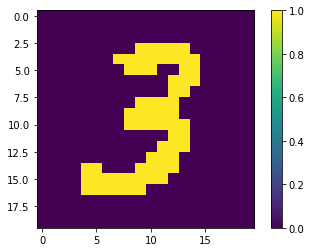

3


In [ ]:
import matplotlib.pyplot as plt
def digitShow(x):
  plt.imshow(x);
  plt.colorbar()
  plt.show()

roW_indeX=np.random.randint(0,5000)
print(roW_indeX)
digitShow((np.reshape(digits_X[roW_indeX,:],(20,20))).T)
print(digits_y[roW_indeX,0])

In [ ]:
def TestDigitData():
  hoRatio = 0.10
  m = digits_X.shape[0]
  numTestVecs = int(m*hoRatio)
  errorCount = 0.0
  # we must randomize the data before sending it to the classifier
  for i in range(numTestVecs):
    classifierResult = classifyKNN(digits_X[i,:],digits_X[numTestVecs:m,:],digits_y[numTestVecs:m],3)
    #print "the classifier came back with: %d, the real answer is: %d"% (classifierResult, datingLabels[i])
    if classifierResult != digits_y[i]: 
      errorCount += 1.0
  print (errorCount/float(numTestVecs))
TestDigitData()

1.0


In [ ]:
def TestDigitDataShuffled():
  hoRatio = 0.10
  m = digits_X.shape[0]
  numTestVecs = int(m*hoRatio)
  errorCount = 0.0
  
  # we must randomize the data before sending it to the classifier
  from sklearn.utils import shuffle
  shuffled_X, shuffled_y = shuffle(digits_X,digits_y, random_state=0)
  
  for i in range(numTestVecs):
    classifierResult = classifyKNN(shuffled_X[i,:],shuffled_X[numTestVecs:m,:],shuffled_y[numTestVecs:m],3)
    #print "the classifier came back with: %d, the real answer is: %d"% (classifierResult, datingLabels[i])
    if classifierResult != shuffled_y[i]: 
      errorCount += 1.0
  print (errorCount/float(numTestVecs))
TestDigitDataShuffled()

0.062


# Lets play with regression problem

In [ ]:
np.random.seed(0)
reg_X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
reg_y = np.sin(reg_X).ravel()

# Add noise to targets
reg_y[::5] += 1 * (0.5 - np.random.rand(8))
 

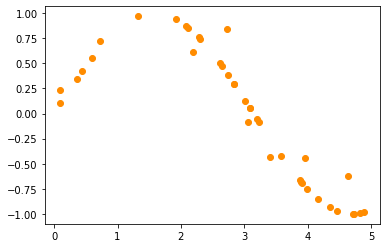

In [ ]:
plt.scatter(reg_X, reg_y, color='darkorange', label='data')

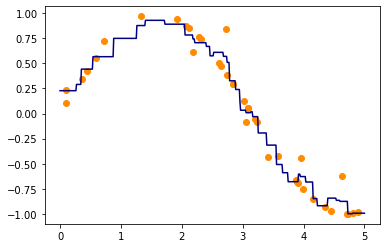

In [ ]:
def regressionKNNUniform(tx,X,y,k):
  y=np.reshape(y,(y.shape[0],))
  
  dataSetSize = X.shape[0]
  diffMat = np.tile(tx, (dataSetSize,1)) - X
  sqDiffMat = diffMat**2
  sqDistances = sqDiffMat.sum(axis=1)
  distances = sqDistances**0.5
  
  sortedDistIndicies = distances.argsort()
  
  
  predicted_value=0
  for i in range(k):
    predicted_value = predicted_value+ y[sortedDistIndicies[i]] * 1
  return predicted_value / k

y_u = [regressionKNNUniform(t,reg_X,reg_y,3) for t in T]
plt.scatter(reg_X, reg_y, color='darkorange', label='data')
plt.plot(T, y_u, color='navy', label='prediction')

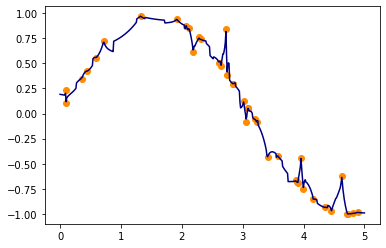

In [ ]:
def regressionKNNweighted(tx,X,y,k):
  y=np.reshape(y,(y.shape[0],))
  dataSetSize = X.shape[0]
  diffMat = np.tile(tx, (dataSetSize,1)) - X
  sqDiffMat = diffMat**2
  sqDistances = sqDiffMat.sum(axis=1)
  distances = sqDistances**0.5
  sortedDistIndicies = distances.argsort()
  predicted_value=0
  s_w = 0
  
  for i in range(k):
    predicted_value = predicted_value+ y[sortedDistIndicies[i]] * (1.0/distances[sortedDistIndicies[i]])
    s_w = s_w+ 1.0/distances[sortedDistIndicies[i]]
  return predicted_value / s_w

y_u = [regressionKNNweighted(t,reg_X,reg_y,3) for t in T]
plt.scatter(reg_X, reg_y, color='darkorange', label='data')
plt.plot(T, y_u, color='navy', label='prediction')

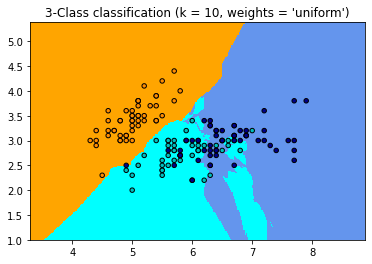

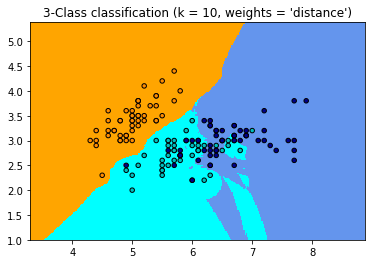

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 10

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()